<a href="https://colab.research.google.com/github/HegRaj/Assignment2/blob/main/Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# Upload File

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ITC/Datasets/raw_house_data.csv')

#Data Key Characteristics

In [4]:
print(df.columns)
print(df.shape)

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')
(5000, 16)


In [5]:
df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


#Data Type

In [6]:
df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


#Trim Empty Spaces

In [7]:
df['fireplaces'] = df['fireplaces'].str.strip(" ")
df['fireplaces'].replace('', pd.NA, inplace=True)
df['fireplaces'].isnull().sum()

<ipython-input-7-7cc35b3a0cc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fireplaces'].replace('', pd.NA, inplace=True)


25

# Handling Missing Value

In [8]:
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [9]:
df[df['bathrooms'].isnull()][['bathrooms', 'year_built']]

,bathrooms,year_built
2025,NaN,2007
2766,NaN,2002
3108,NaN,2007
3529,NaN,2006
3822,NaN,2007
4812,NaN,1999


## Drop Missing Values

In [10]:
cleaned_df = df.dropna(subset=['sqrt_ft'])

In [11]:
cleaned_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


## Impute Missing Value with 0

In [12]:
cleaned_df['garage'].fillna(value=0, inplace=True)
cleaned_df['kitchen_features'].fillna(value='Others', inplace=True)
cleaned_df['HOA'].fillna(value=0, inplace=True)

<ipython-input-12-7c609b5c2ee6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['garage'].fillna(value=0, inplace=True)
<ipython-input-12-7c609b5c2ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['garage'].fillna(value=0, inplace=True)
<ipython-input-12-7c609b5c2ee6>:2: FutureWarning: A value is trying to be set on 

In [13]:
cleaned_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


#Feature Engineering

## Adding Rooms and SQ/FT Column

In [14]:
cleaned_df['rooms'] = cleaned_df['bathrooms'].astype(np.int64) + cleaned_df['bedrooms']
cleaned_df['price_per_sqft'] = cleaned_df['sold_price'] / cleaned_df['sqrt_ft']

<ipython-input-14-15849b0a1866>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['rooms'] = cleaned_df['bathrooms'].astype(np.int64) + cleaned_df['bedrooms']
<ipython-input-14-15849b0a1866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price_per_sqft'] = cleaned_df['sold_price'] / cleaned_df['sqrt_ft']


In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4944 non-null   int64  
 1   sold_price        4944 non-null   float64
 2   zipcode           4944 non-null   int64  
 3   longitude         4944 non-null   float64
 4   latitude          4944 non-null   float64
 5   lot_acres         4944 non-null   float64
 6   taxes             4944 non-null   float64
 7   year_built        4944 non-null   int64  
 8   bedrooms          4944 non-null   int64  
 9   bathrooms         4944 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4944 non-null   float64
 12  kitchen_features  4944 non-null   object 
 13  fireplaces        4944 non-null   object 
 14  floor_covering    4944 non-null   object 
 15  HOA               4944 non-null   object 
 16  rooms             4944 non-null   int64  
 17  

In [17]:
# cleaned_df['kitchen_features'] = cleaned_df['kitchen_features'].astype(str)

# Determine Bin value

In [18]:
print(np.max(cleaned_df['price_per_sqft']))
print(np.min(cleaned_df['price_per_sqft']))

1208.3333333333333
24.544805426633346


In [19]:
# num_bins = int(np.sqrt(len(cleaned_df)))
# num_bins

In [20]:
# dt = np.array(cleaned_df['price_per_sqft'])

# qr75 = np.percentile(dt, 75)
# qr25 = np.percentile(dt, 25)
# iqr = qr75 - qr25

# bwidth = 2 * iqr * (len(dt) ** (-1/3))

# bin_num = int(np.round((np.max(dt) - np.min(dt)) / bwidth))
# bin_num

In [21]:
# bwidth

---

# Create Bins

In [22]:
cleaned_df['price_per_sqft_bins'] = pd.qcut(cleaned_df['price_per_sqft'], q = 20, labels=False)

<ipython-input-22-f775ec23aea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price_per_sqft_bins'] = pd.qcut(cleaned_df['price_per_sqft'], q = 20, labels=False)


In [27]:
cleaned_df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,rooms,price_per_sqft,price_per_sqft_bins
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,23,504.761905,19
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,4,575.342466,19
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,12,498.946668,19
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,10,533.372420,19
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422,7,475.007308,19


In [28]:
cleaned_df.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,rooms,price_per_sqft,price_per_sqft_bins
count,4.944000e+03,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2.147703e+07,7.757358e+05,85724.128236,-110.910942,32.314540,4.270884,9.444989e+03,1992.259506,3.935477,3.824939,3716.366828,2.813309,7.759304,212.527212,9.499798
std,1.419951e+06,3.160465e+05,36.803079,0.120604,0.169380,45.851750,1.739144e+05,65.830904,1.160795,1.318048,1120.683515,1.199474,2.252590,66.730393,5.768092
min,4.110917e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1100.000000,0.000000,2.000000,24.544805,0.000000
25%,2.140945e+07,5.850000e+05,85718.000000,-110.978590,32.280278,0.580000,4.819410e+03,1987.000000,3.000000,3.000000,3047.000000,2.000000,7.000000,175.502133,4.750000
50%,2.161620e+07,6.790000e+05,85737.000000,-110.922462,32.319136,0.980000,6.248770e+03,1999.000000,4.000000,4.000000,3512.000000,3.000000,7.000000,202.598297,9.500000
75%,2.180543e+07,8.400000e+05,85750.000000,-110.858578,32.396124,1.740000,8.106153e+03,2006.000000,4.000000,4.000000,4130.250000,3.000000,9.000000,234.103497,14.250000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.000000,36.000000,36.000000,22408.000000,30.000000,71.000000,1208.333333,19.000000


---

# Count Kitchen Appliances

In [32]:
cleaned_df['kitchen_features_list'] = cleaned_df['kitchen_features'].str.split(', ')

<ipython-input-32-b3a3f7ca6cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['kitchen_features_list'] = cleaned_df['kitchen_features'].str.split(', ')


In [33]:
cleaned_df['kitchen_features_list'] = cleaned_df['kitchen_features_list'].apply(len)

<ipython-input-33-4d148eadbdc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['kitchen_features_list'] = cleaned_df['kitchen_features_list'].apply(len)


In [34]:
cleaned_df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,rooms,price_per_sqft,price_per_sqft_bins,kitchen_features_list
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,23,504.761905,19,4
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,4,575.342466,19,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,12,498.946668,19,4
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,10,533.372420,19,5
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422,7,475.007308,19,5


# Count Number of Floor Coverings in the House

In [35]:
cleaned_df['No_floor_covering'] = cleaned_df['floor_covering'].str.split(', ')
cleaned_df['No_floor_covering'] = cleaned_df['No_floor_covering'].apply(len)

<ipython-input-35-d9aeb657440b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['No_floor_covering'] = cleaned_df['floor_covering'].str.split(', ')
<ipython-input-35-d9aeb657440b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['No_floor_covering'] = cleaned_df['No_floor_covering'].apply(len)


In [37]:
cleaned_df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,rooms,price_per_sqft,price_per_sqft_bins,kitchen_features_list,No_floor_covering
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0,23,504.761905,19,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0,4,575.342466,19,2,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0,12,498.946668,19,4,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55,10,533.372420,19,5,2
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422,7,475.007308,19,5,3


---

# Drop Duplicate Columns

In [38]:
cleaned_df.drop(columns=['kitchen_features', 'floor_covering','bedrooms', 'bathrooms'], inplace=True)

<ipython-input-38-ac019536f640>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=['kitchen_features', 'floor_covering','bedrooms', 'bathrooms'], inplace=True)


In [39]:
cleaned_df.tail(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,rooms,price_per_sqft,price_per_sqft_bins,kitchen_features_list,No_floor_covering
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,3601.0,3.0,1,0,8,137.461816,0,9,2
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,2318.0,3.0,1,43,7,237.273512,15,10,2
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,1772.0,0.0,0,0,5,268.058691,17,6,1
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,3724.0,3.0,1,0,8,147.690655,1,9,2
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4317.0,0.0,3,0,8,104.239055,0,5,2


---

#Split the Column

In [40]:
df_test = cleaned_df[['longitude', 'latitude', 'price_per_sqft_bins']]

In [41]:
train_data = df_test.to_numpy()

In [43]:
X = train_data[:,0:2]

In [44]:
y = train_data[:,-1]

In [45]:
y = y.astype(int)

#Train and Test Split

In [53]:
# train_data = house.sample(frac=0.9, random_state=42)
# test_data = house.drop(train_data.index)

In [54]:
# np.random.seed(30)
# index=np.random.permutation(X.shape[0])

In [55]:
# train_size = int(X.shape[0] * 0.8)

# train_index = index[:train_size]
# test_index = index[train_size:]

In [56]:
# X, X_test = X[train_index], X[test_index]
# y, y_test = y[train_index], y[test_index]

---

---

#KNN Classification

In [58]:
class KNNClassifier():

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):

        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt] + epsilon))

            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
        return y_hat

In [59]:
def accuracy (y,y_hat):
    return np.mean(y==y_hat)

In [60]:
knn_instance = KNNClassifier()
knn_instance.fit(X,y)

In [61]:
y_hat_knn = knn_instance.predict(X, K=5)

In [62]:
X

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-111.035925,   31.645878],
       ...,
       [-110.755428,   32.964708],
       [-111.055528,   32.296871],
       [-110.913054,   31.385259]])

In [63]:
accuracy(y,y_hat_knn)

0.6875

Text(0.5, 47.7222222222222, 'Predicted label')

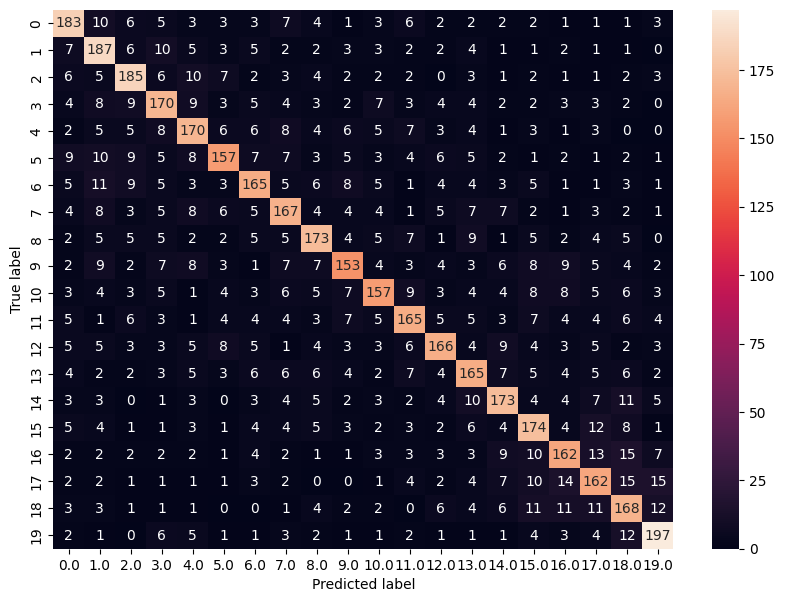

In [64]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(y_hat_knn, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [65]:
# y_hat_knn_test = knn_instance.predict(X_test, K=5)

In [66]:
#accuracy(y_test,y_hat_knn_test)

---

---

#Merge New Bins into Original DF

In [68]:
new_bin = pd.DataFrame(y_hat_knn)

In [70]:
merged_df = pd.merge(new_bin, cleaned_df, left_index=True, right_index=True, how='inner')

In [71]:
merged_df.rename(columns={0: 'New_Price/Sqft_bin'}, inplace=True)

In [72]:
merged_df

,New_Price/Sqft_bin,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,rooms,price_per_sqft,price_per_sqft_bins,kitchen_features_list,No_floor_covering
0,19.0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500.0,0.0,6,0,23,504.761905,19,4,2
1,4.0,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300.0,0.0,5,0,4,575.342466,19,2,2
3,19.0,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,9019.0,4.0,4,0,12,498.946668,19,4,3
4,19.0,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,6396.0,3.0,5,55,10,533.372420,19,5,2
5,4.0,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,6842.0,3.0,5,422,7,475.007308,19,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,7.0,21713498,525000.0,85739,-110.895274,32.515669,0.23,3275.30,2008,2468.0,2.5,1,165,7,212.722853,11,5,1
4940,9.0,21704842,540000.0,85718,-110.911139,32.286816,0.64,5831.99,1999,2600.0,3.0,1,42,7,207.692308,10,5,2
4941,17.0,21713018,539500.0,85716,-110.930758,32.229400,0.16,1164.49,1939,2201.0,0.0,1,0,7,245.115856,16,3,2
4942,1.0,21704302,508000.0,85718,-110.886508,32.328239,0.93,6216.54,1974,3276.0,2.0,1,258,6,155.067155,2,4,2


In [73]:
merged_df.drop('price_per_sqft_bins', axis=1, inplace=True)
merged_df

,New_Price/Sqft_bin,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,rooms,price_per_sqft,kitchen_features_list,No_floor_covering
0,19.0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500.0,0.0,6,0,23,504.761905,4,2
1,4.0,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300.0,0.0,5,0,4,575.342466,2,2
3,19.0,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,9019.0,4.0,4,0,12,498.946668,4,3
4,19.0,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,6396.0,3.0,5,55,10,533.372420,5,2
5,4.0,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,6842.0,3.0,5,422,7,475.007308,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,7.0,21713498,525000.0,85739,-110.895274,32.515669,0.23,3275.30,2008,2468.0,2.5,1,165,7,212.722853,5,1
4940,9.0,21704842,540000.0,85718,-110.911139,32.286816,0.64,5831.99,1999,2600.0,3.0,1,42,7,207.692308,5,2
4941,17.0,21713018,539500.0,85716,-110.930758,32.229400,0.16,1164.49,1939,2201.0,0.0,1,0,7,245.115856,3,2
4942,1.0,21704302,508000.0,85718,-110.886508,32.328239,0.93,6216.54,1974,3276.0,2.0,1,258,6,155.067155,4,2


In [74]:
merged_df[merged_df['HOA'].isnull()]

,New_Price/Sqft_bin,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,fireplaces,HOA,rooms,price_per_sqft,kitchen_features_list,No_floor_covering


#Correlation Matrix

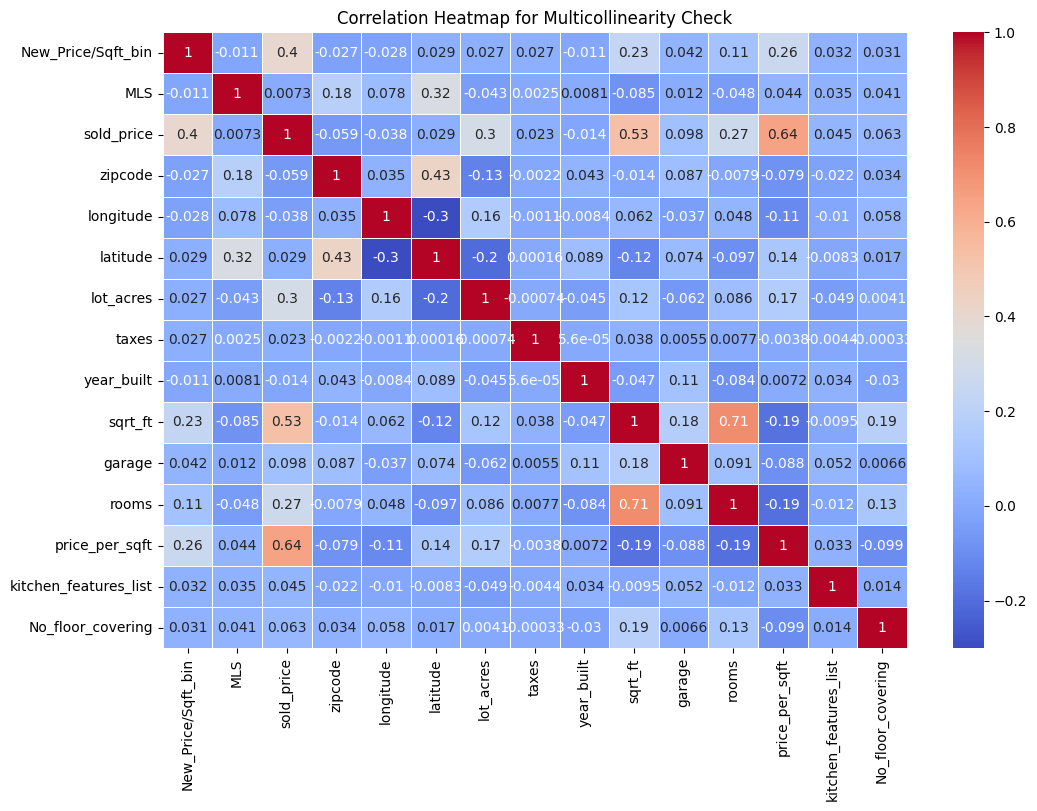

In [75]:
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64','int32']).columns


correlation_matrix = merged_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Multicollinearity Check')
plt.show()

#Split Training and Test Dataset

In [76]:
merged_df['fireplaces'] = merged_df['fireplaces'].astype(int)

In [77]:
merged_df['HOA'] = pd.to_numeric(merged_df['HOA'].str.replace(',', ''), errors='coerce')

In [78]:
merged_df.drop(columns=['MLS', 'zipcode', 'price_per_sqft', 'longitude', 'kitchen_features_list', 'latitude', 'HOA'], inplace=True)

In [79]:
merged_df.isnull().sum()

,0
New_Price/Sqft_bin,0
sold_price,0
lot_acres,0
taxes,0
year_built,0
sqrt_ft,0
garage,0
fireplaces,0
rooms,0
No_floor_covering,0


In [80]:
df_test_m = merged_df

In [81]:
train_data_m = df_test_m.sample(frac=0.9, random_state=42)
test_data_m = df_test_m.drop(train_data_m.index)

In [82]:
train_data = train_data_m.to_numpy()
test_data = test_data_m.to_numpy()

### Slicing X and y

In [83]:
y = train_data[:,-1]
X = train_data[:,0:-1]

In [84]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [85]:
y_test = test_data[:,-1]
X_test = test_data[:,0:-1]

In [86]:
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [87]:
y.min()

1.0

---

#OLS Regressor

In [88]:
def MAE (Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y, Y_hat):
  N = len(Y)
  return 1-((np.sum((Y - Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS (Y, Y_hat, N):
  return((1/(2*N))*np.sum((Y-Y_hat)**2))

In [89]:
class MLinearRegression():

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D  = X.shape
    Y=y

    #Begin SGD Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel('epochs')
      plt.ylabel("$\mathcal{J}$")
      plt.title('Training Curve')

  def predict(self, x):
      return x@self.W

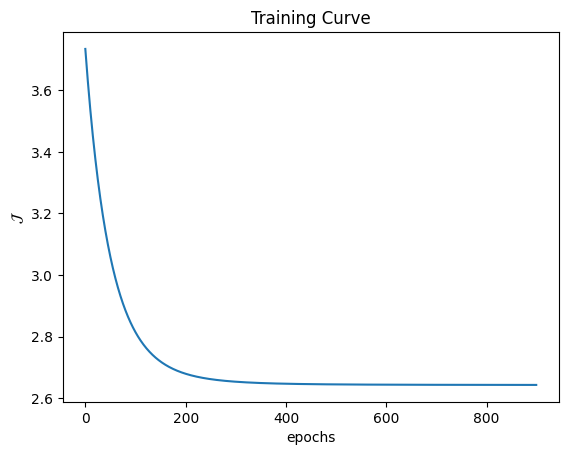

In [90]:
my_reg = MLinearRegression()
my_reg.fit(X, y, eta=9e-3, epochs=900, show_curve=True)

In [91]:
y_hat_train = my_reg.predict(X)

In [92]:
MAE (y, y_hat_train)

4422.003388697454

In [93]:
y_hat_test = my_reg.predict(X_test)

In [94]:
MAE (y_test, y_hat_test)

491.55582962640466

In [95]:
R2(y, y_hat_train)

-0.11452623944868856

In [96]:
R2(y_test, y_hat_test)

-0.11242389746224069

In [97]:
y_hat_train

array([ 0.18131785,  0.3125688 , -0.0359816 , ...,  0.05313409,
        0.05314705,  0.28693783])

---

#KNN Regressor

In [98]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt]) / (np.exp (-dist2[idxt]).sum() + epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [99]:
knnr = KNNRegressor()
knnr.fit(X, y)

In [100]:
y_hat_train1 = knnr.predict(X, 8)

In [101]:
y_hat_test = knnr.predict(X_test, 8)

In [102]:
MAE (y, y_hat_train1)

1148.8086487577839

In [103]:
R2(y, y_hat_train1)

-1.729851846224605

In [104]:
MAE (y_test, y_hat_test)

181.13029521495133

In [105]:
R2(y_test, y_hat_test)

-2.0546090658420266

#Demo

## Input Long, Lat

In [113]:
X_demo_latlong = np.array([[-112.520168	, 31.356362]])
X_demo_latlong

array([[-112.520168,   31.356362]])

## Input X features

In [114]:
X_demo = np.array([[5300000, 2154 , 5272 , 1941 , 10500 , 0 , 6 , 23 ]])
X_demo

array([[5300000,    2154,    5272,    1941,   10500,       0,       6,
             23]])

##KNN Classifier to Predict New_bins

In [115]:
y_hat_knn_demo = knn_instance.predict(X_demo_latlong, K=5)
y_hat_knn_demo

array([16.])

##Combine Bins with Origianl data

In [116]:
combined = np.hstack((y_hat_knn_demo.reshape(1, 1), X_demo))
combined

array([[1.600e+01, 5.300e+06, 2.154e+03, 5.272e+03, 1.941e+03, 1.050e+04,
        0.000e+00, 6.000e+00, 2.300e+01]])

In [110]:
############################## New_Price/Sqft_bin ,
# sold_price ,
# lot_acres ,
# taxes	,
# year_built	,
# sqrt_ft	,
# garage	,
# fireplaces	,
# rooms	,
#############################No_floor_covering	,

#KNN Regressor

In [117]:
y_hat_test_demo = knnr.predict(combined, 8)
y_hat_test_demo

array([0.])

# OLS Regressor

In [118]:
y_hat_train_demo = my_reg.predict(combined)
y_hat_train_demo

array([-153358.22872185])